In [1]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
#import the datasets for gene expression and type of cancer labels
data = pd.read_csv("data.csv", index_col=[0])
labels = pd.read_csv("labels.csv", index_col=[0])

In [3]:
data.shape

(801, 20531)

In [4]:
labels.shape

(801, 1)

In [7]:
data.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [6]:
labels.head()

,Class
sample_0,PRAD
sample_1,LUAD
sample_2,PRAD
sample_3,PRAD
sample_4,BRCA


In [8]:
df=data.join(labels)

In [8]:
df.shape

(801, 20532)

In [9]:
df.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [9]:
# Separate features (gene expression values) and target (cancer type labels)
X = df.drop(columns=['Class'])
y = df['Class']

In [11]:
X

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
sample_799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [12]:
y

sample_0      PRAD
sample_1      LUAD
sample_2      PRAD
sample_3      PRAD
sample_4      BRCA
              ... 
sample_796    BRCA
sample_797    LUAD
sample_798    COAD
sample_799    PRAD
sample_800    PRAD
Name: Class, Length: 801, dtype: object

In [10]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
# Perform PCA
pca = PCA(n_components=4) 
X_pca = pca.fit_transform(X_scaled)

In [12]:
# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=["PC1", "PC2","PC3","PC4"])


In [13]:
# Add the cancer type labels back to the DataFrame
y = y.reset_index(drop=True)
final_df = pd.concat([pca_df, y], axis=1)
final_df.columns = ["PC1", "PC2","PC3","PC4", "Class"]



In [21]:
final_df.head()

,PC1,PC2,PC3,PC4,Class
0,-57.446987,95.410981,74.301543,-12.166781,PRAD
1,-16.919430,0.732470,-64.072900,-2.095311,LUAD
2,-70.345218,-19.303327,20.488241,48.102907,PRAD
3,-49.161592,-9.227586,61.243771,37.805764,PRAD
4,-18.132534,-51.327797,16.598116,-17.699200,BRCA


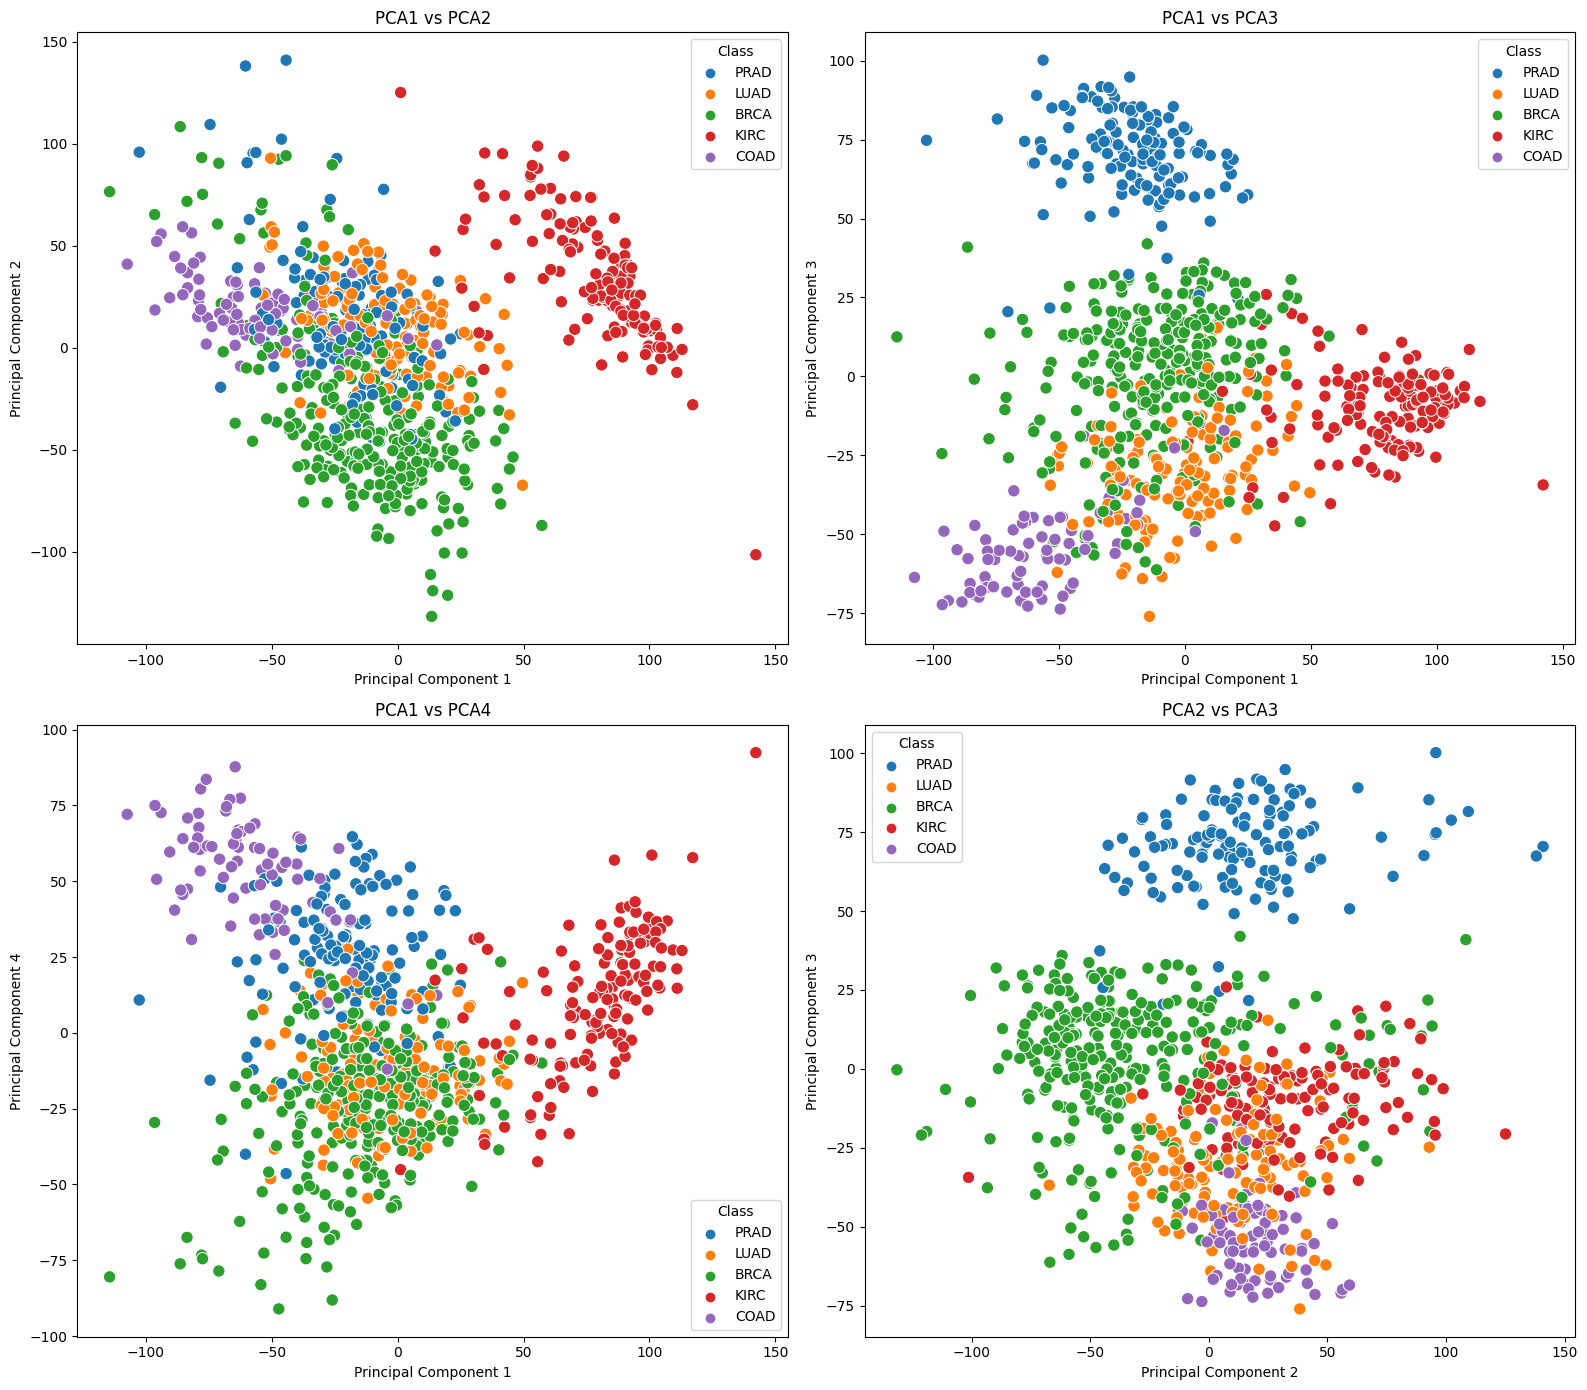

In [17]:
# Convert PCA components to DataFrame
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(4)])

y = labels.values.flatten()
final_df = pd.concat([pca_df, pd.Series(y, name='Class')], axis=1)

plt.figure(figsize=(16, 14))

plt.subplot(2, 2, 1)
sns.scatterplot(x="PC1", y="PC2", hue="Class", data=final_df, s=80)
plt.title("PCA1 vs PCA2")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.subplot(2, 2, 2)
sns.scatterplot(x="PC1", y="PC3", hue="Class", data=final_df,s=80)
plt.title("PCA1 vs PCA3")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 3")

plt.subplot(2, 2, 3)
sns.scatterplot(x="PC1", y="PC4", hue="Class", data=final_df,s=80)
plt.title("PCA1 vs PCA4")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 4")

plt.subplot(2, 2, 4)
sns.scatterplot(x="PC2", y="PC3", hue="Class", data=final_df, s=80)
plt.title("PCA2 vs PCA3")
plt.xlabel("Principal Component 2")
plt.ylabel("Principal Component 3")

plt.tight_layout()
plt.show()

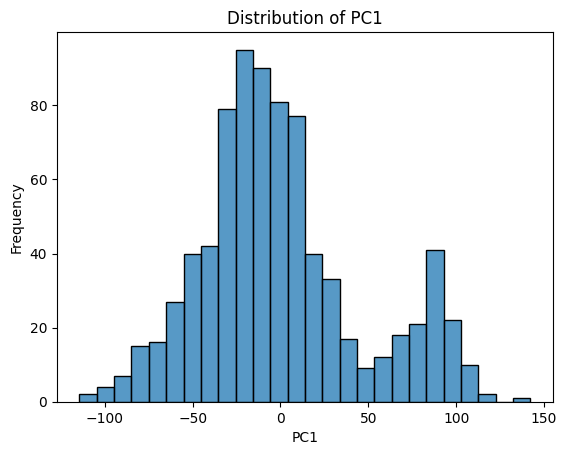

In [18]:
pc1 = "PC1"
sns.histplot(data=pca_df, x=pc1)
plt.xlabel(pc1)
plt.ylabel("Frequency")
plt.title(f"Distribution of {pc1}")
plt.show()

# Probability Density: The y-axis represents the probability density of the data points along the chosen PC (e.g., PC1).
# Higher Density, More Data Points: A higher value on the y-axis indicates a higher density of data points at that particular value on the PC.


# The numerical values on the x-axis (ranging from -6 to 6 in your case) represent the possible scores (positions) that data points can have on PC1.

# These scores don't have a direct physical meaning unless you know the original features that contribute to PC1. However, they tell you how much a data point is influenced by the features that define PC1.

# Positive values: Data points with higher PC1 values are likely influenced more by the features that have positive weights in defining PC1.
# Negative values: Data points with lower PC1 values are likely influenced more by the features with negative weights in defining PC1.
# Zero: A value of zero on the x-axis indicates the data point is not strongly influenced by either set of features defining PC1 (positive or negative).


# In Principal Component Analysis (PCA), positive weights refer to the coefficients assigned to original features when creating a new principal component (PC). These weights determine how much each original feature contributes to the new PC and the direction of its influence.

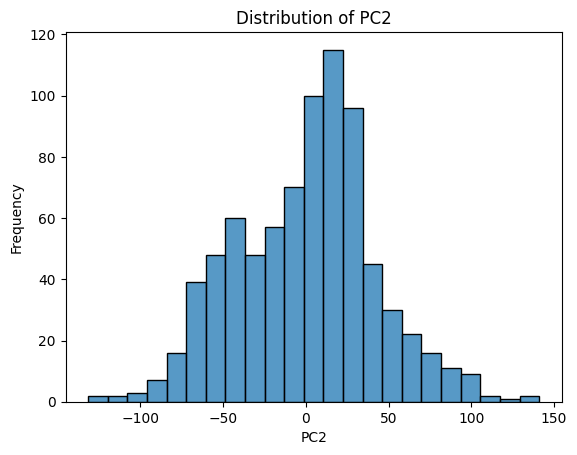

In [19]:
pc2 = "PC2"
sns.histplot(data=pca_df, x=pc2)
plt.xlabel(pc2)
plt.ylabel("Frequency")
plt.title(f"Distribution of {pc2}")
plt.show()

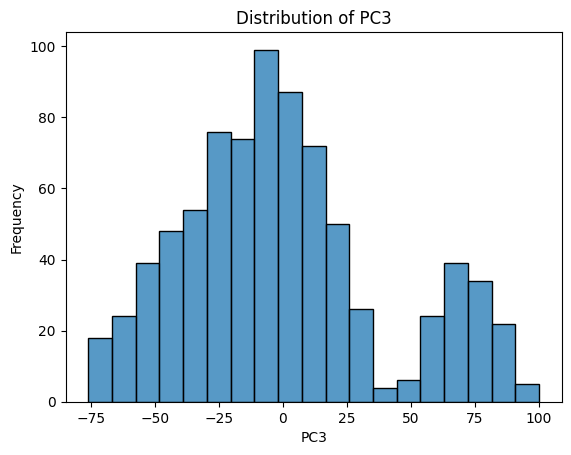

In [20]:
pc3 = "PC3"
sns.histplot(data=pca_df, x=pc3)
plt.xlabel(pc3)
plt.ylabel("Frequency")
plt.title(f"Distribution of {pc3}")
plt.show()

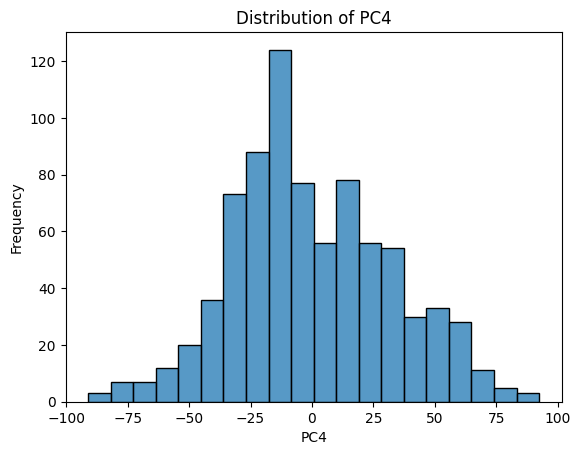

In [21]:
pc4 = "PC4"
sns.histplot(data=pca_df, x=pc4)
plt.xlabel(pc4)
plt.ylabel("Frequency")
plt.title(f"Distribution of {pc4}")
plt.show()

In [23]:
#libraried to train and test model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [24]:
# Selecting the principal components
X_pca = final_df[['PC1', 'PC2',"PC3","PC4"]]

In [25]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, final_df['Class'], test_size=0.2, random_state=42)


Random Forest Classifier

In [26]:
# Training a Random Forest classifier on the principal components
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [27]:
# Making predictions for Random Forest
y_pred = rf_classifier.predict(X_test)

In [28]:
# Evaluating the Random Forest model
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 0.9440993788819876


Support Vector Machine

In [30]:
#Using SVM
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [31]:
# Make predictions
y_pred_svm = svm_classifier.predict(X_test)


In [32]:
# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

SVM Accuracy: 0.9937888198757764


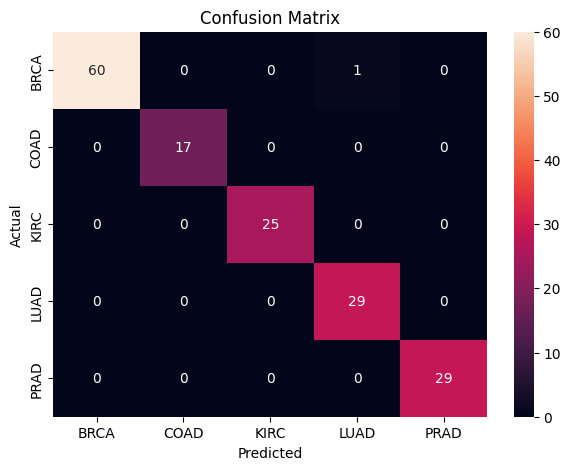

In [48]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred_svm)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Gradient Boosting

In [34]:
#Using Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [35]:
# Make predictions
y_pred_gb = gb_classifier.predict(X_test)

In [36]:
# Evaluate the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)

Gradient Boosting Accuracy: 0.937888198757764
